In [1]:
# *************************************************************************************
# *                          © 2019 Roshini Saravanakumar                             *
# *************************************************************************************

import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter

df = pd.read_csv('data/raw_data.csv')
df.drop(columns='Row Number', inplace=True)

df = df[['Area', 'Item', 'Year', 'Production', 'Import Quantity', 'Export Quantity']]
df.rename(columns={'Area': 'Country', 'Item':'Produce', 'Production':'Production Quantity'}, inplace=True)

df.head() 

,Country,Produce,Year,Production Quantity,Import Quantity,Export Quantity
0,Armenia,Potatoes,2000,290260.0,390.0,300.0
1,Armenia,Potatoes,2001,363834.0,2290.0,0.0
2,Armenia,Potatoes,2002,374263.0,1918.0,0.0
3,Armenia,Potatoes,2003,507518.0,2853.0,7.0
4,Armenia,Potatoes,2004,576427.0,1553.0,0.0


In [2]:
# create a lookup table for countries and their centroid locations
lookup = pd.read_csv('data/country_centroids.csv')
lookup.rename(columns={'country':'code'}, inplace=True)
lookup.index = lookup['name']
(lookup.drop(columns=['name'])).to_csv('data/countries_lookup.csv')


# FIXME --------------------------------------------------------------------------
# ********************************************************************************
# Assuming that China is a sum of mainland, taiwan, hong kong and macao
# 'Serbia and Montenegro' - set coordinates to average of Serbia and Montenegro
# 'South Sudan' and 'Sudan (former)'- set coordinates to Sudan's coordinates

# print regions that are not present in the countries lookup table
set(df[~df['Country'].isin(lookup['name'])]['Country'])

{'Africa',
 'Americas',
 'Asia',
 'Australia & New Zealand',
 'Caribbean',
 'Central America',
 'Central Asia',
 'China',
 'Eastern Africa',
 'Eastern Asia',
 'Eastern Europe',
 'Europe',
 'European Union',
 'Land Locked Developing Countries',
 'Least Developed Countries',
 'Low Income Food Deficit Countries',
 'Melanesia',
 'Middle Africa',
 'Net Food Importing Developing Countries',
 'Northern Africa',
 'Northern America',
 'Northern Europe',
 'Occupied Palestinian Territory',
 'Oceania',
 'Polynesia',
 'Small Island Developing States',
 'South America',
 'South-Eastern Asia',
 'Southern Africa',
 'Southern Asia',
 'Southern Europe',
 'Western Africa',
 'Western Asia',
 'Western Europe',
 'World'}

In [3]:
# remove the regions printed above from the dataframe
df = df[df['Country'].isin(lookup.index)]
df.index = df['Country']
df.drop(columns='Country', inplace=True)
df.to_csv('data/relevant_data.csv')

# randomly print 10 entries from the dataframe for an example of what it contains
df.sample(n=10)

,Produce,Year,Production Quantity,Import Quantity,Export Quantity
Country,,,,,
Morocco,Lemons and limes,2002,11400.0,1.0,160.0
Greece,"Grain, mixed",2001,1855.0,1623.0,0.0
Morocco,Oats,2003,17590.0,115.0,0.0
Nepal,Buckwheat,2000,0.0,0.0,0.0
Belgium,Mushrooms and truffles,2001,40500.0,7135.0,29201.0
Colombia,Oranges,2014,233342.0,1156.0,12930.0
Benin,"Beans, dry",2010,107363.0,10.0,6.0
Austria,"Beans, dry",2008,0.0,2017.0,607.0
France,Hops,2005,1374.0,425.0,660.0


In [4]:
# create a set of produce that shows up in the dataset
produce = (pd.Series(list(set(df['Produce'])))).sort_values()
produce.to_csv('data/produce.csv', index=False, header=['Produce'])

# print 10 random entries for an example of what this set contains
produce.sample(n=10)

102           Cocoa, beans
35              Sugar beet
110         Sunflower seed
71                 Papayas
47                Rapeseed
27     Carrots and turnips
96            Strawberries
85              Pistachios
69           Coffee, green
8                      Rye
dtype: object

In [5]:
# create a set of years that show up in the dataset
years = (pd.Series(list(set(df['Year'])))).sort_values()
years.to_csv('data/years.csv', index=False, header=['Year'])

# print the set
years

1     2000
2     2001
3     2002
4     2003
5     2004
6     2005
7     2006
8     2007
9     2008
10    2009
11    2010
12    2011
13    2012
14    2013
15    2014
16    2015
0     2016
dtype: int64

['#a1c9f4',
 '#ffb482',
 '#8de5a1',
 '#ff9f9b',
 '#d0bbff',
 '#debb9b',
 '#fab0e4',
 '#cfcfcf',
 '#fffea3',
 '#b9f2f0',
 '#a1c9f4',
 '#ffb482',
 '#8de5a1',
 '#ff9f9b',
 '#d0bbff']

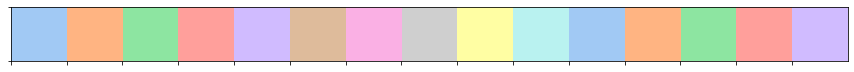

In [6]:
# map visualization palette generation
map_palette = sns.color_palette('pastel', 15)
sns.palplot(map_palette)
map_palette.as_hex()